# Effecient Bernoulli Factories MCMC for intracable posteriors

## Ques1: Paper Summary

### Barker's Algorithm

$\textrm{Barker's Algorithm is an alternative to the popular Metropolis Hastings Algorithm. In the MH Algorithm, samples are accepted with a }$
$\textrm{probability }\mathrm{\alpha_{MH} = min(1,\frac{\pi(y)q(x|y)}{\pi(x)q(y|x})}\textrm{. Barker's algorithm replaces this acceptance probability with a new acceptance probability defined by: }$
$$\mathrm{ \alpha_{B} = \frac{\pi(y)q(y,x)}{\pi(x)q(x,y)+\pi(y)q(y,x)}}$$
$\textrm{where y is the proposal and x is the value of the previous sample.}$

$\textrm{The difficulty with Barker's algorithm is that sometimes it can be difficult to compute }\mathrm{\alpha_{B}}\textrm{, when the target density is intracable. So we have }$
$\textrm{to find a way to simulate an event with probability }\mathrm{\alpha_{B}}\textrm{. The paper suggests using Bernoulli factories to do so.}$ 



$\textrm{The paper suggests the two coin algorithm (Algorithm 2) to simulate an event with the desired probability. The algorithm requires finding }$
$\textrm{certain values beforehand. To find }\mathrm{c_{x}}\textrm{ and }\mathrm{p_{x}}\textrm{ such that:}$

$$\mathrm{\pi(x)q(x,y)=c_{x}p_{x}}$$
$\textrm{To find }\mathrm{c_{x}}\textrm{, we find the constant such that }\mathrm{p_{x}}\textrm{ is a valid probability, hence:}$
$$\mathrm{ \pi(x)q(x,y)\le c_{x} and hence}$$
$$\mathrm{ p_{x} = \frac{\pi(x)q(x,y)}{c_{x}}}$$
$\textrm{Similarly, we can find }\mathrm{p_{y}}\textrm{ and }\mathrm{ c_{y}.}\textrm{ The disadvantage of this algorithm is that it can be ineffecient for certain values of }\mathrm{c_{x}}\textrm{ and }\mathrm{c_{y}.}\textrm{ Hence, the }$
$\textrm{paper puts forward the more computationally effecient Portkey Barker Algorithm.}$


### Portkey Barker's Algorithm

$\textrm{ The Portkey Barker method uses an acceptance probability given by: }$
$$\mathrm{ \alpha = \frac{\pi(y)q(y,x)}{\pi(x)q(x,y)+\pi(y)q(y,x)+d(x,y)}}$$
$\textrm{where }\mathrm{d(x,y)}\textrm{ is given by:}$
$$\mathrm{d(x,y) = \frac{1-\beta}{\beta}(c_{x}+c_{y})}$$
$\textrm{Thus the paper suggested a modified version of algorithm 2 that simulates an event with the new acceptance probability, given a }\mathrm{\beta.}$
$\textrm{Basically, a random sample from Bernoulli(}\mathrm{\beta}\textrm{) is drawn. If the output is 0, then we reject the proposed sample. If not, we run algorithm 2 as}$
$\textrm{before.}  $
$\textrm{The main advantage of the newer algorithm is that it is much more computationally effecient than the previous algorithm, when }\mathrm{\beta}\textrm{ is close to 1.}$
$\textrm{However, this advantage comes at a cost. The algorithm is statistically more ineffecient than the previous one.}$

### Flipped Portkey Barker's Algorithm

$\textrm{The Flipped Portkey Barker's Algorithm is an alternative to the Portkey Barker's algorithm. In cases where it is difficult to find }\mathrm{c_{x}}\textrm{, we can }$
$\textrm{use the Flipped Portkey Barker method. In this method, instead of finding a lower bound, we find an upper bound on }\mathrm{\pi(x)q(x,y).}\textrm{ In a fashion }$
$\textrm{similar to algorithm 3, we can devise an updated algorithm for this method.}$

## Ques 2:

In [1]:
using Printf
using Statistics
using Random
using Pkg
using Distributions
using Plots
using SpecialFunctions
using StatsPlots
using StatsBase


In [2]:
Random.seed!(69)

TaskLocalRNG()

In [3]:
n_samples=10000
k=10
mix=Gamma(10,1/100)


Gamma{Float64}(α=10.0, θ=0.01)

In [9]:
function Barker(beta)
    samples=ones(n_samples,1)*0.2
    samples[1]=10/100 * gamma(1 + 1/k)
    for i in 2:n_samples
        prop=rand(Normal(samples[i-1],sqrt(0.001)),1)[1]
        if(prop<0)
            samples[i]=samples[i-1]
            continue
        end 
    
        c_y=k/(exp(1)*prop)
        c_x=k/(exp(1)*samples[i-1])
       
        
        
        
        while (1==1)
            S=rand(Bernoulli(beta),1)[1]
            if(S==0)
                samples[i]=samples[i-1]
                break
            end 
            c1=(rand(Bernoulli(c_y/(c_y+c_x)),1))[1]
     
            if c1==1
                lambda=rand(mix,1)[1][1]
                wei_y=pdf(Weibull(k,lambda), prop)/c_y
              
                c2=rand(Bernoulli(wei_y),1)[1]
                if(c2==1) 
                    samples[i]=prop
                    break
                end
            else
                lambda=rand(mix,1)[1][1]
                wei_x=pdf(Weibull(k,lambda), samples[i-1])/c_x

                c2=rand(Bernoulli(wei_x),1)[1]
                if(c2==1) 
                    samples[i]=samples[i-1]
                    break
                end
            end 
        end 
   
    end
    return samples
end 

  
    
            
        
            
        
    

Barker (generic function with 1 method)

In [11]:
b=[1, 0.99, 0.95, 0.9, 0.85, 0.8, 0.75, 0.6]
trace_plots=[]
autocor_plots=[]
for i in b

    samples=Barker(i)
    p1=plot(samples, color=4, title=i, labels="")
    p2=plot(autocor(samples), color=4, title=i, labels="")
    push!(trace_plots,p1)
    push!(autocor_plots, p2)
end 
    




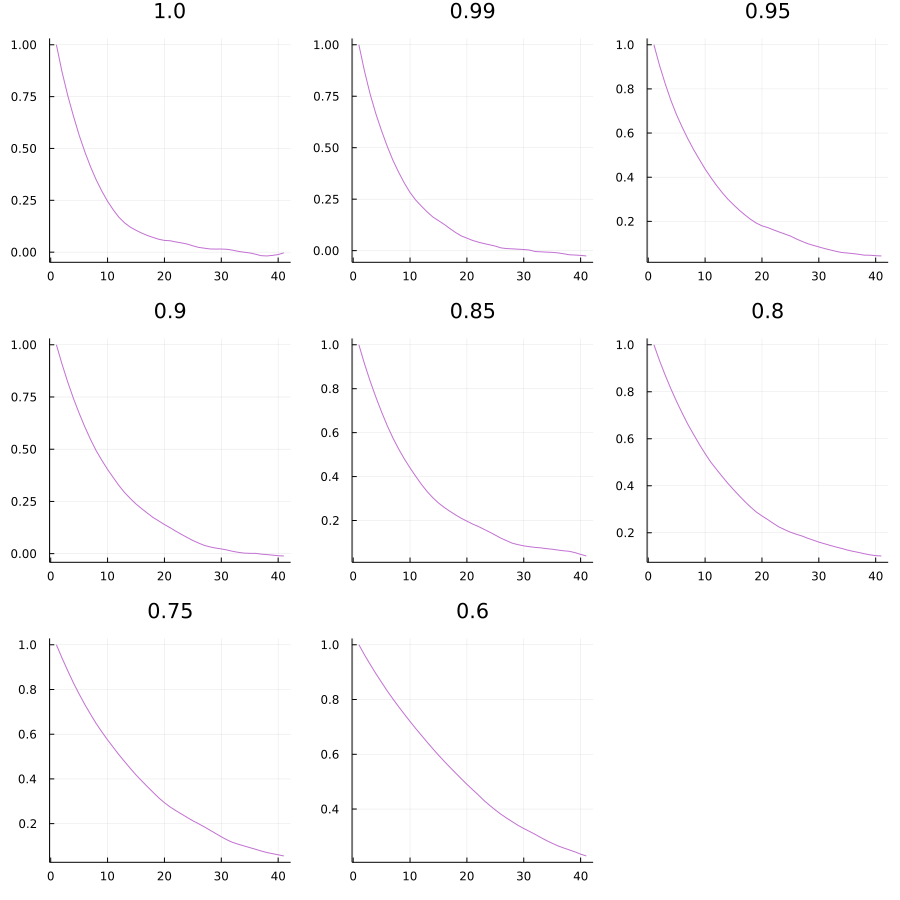

In [12]:
plot(autocor_plots...)
plot!(size=(900,900))

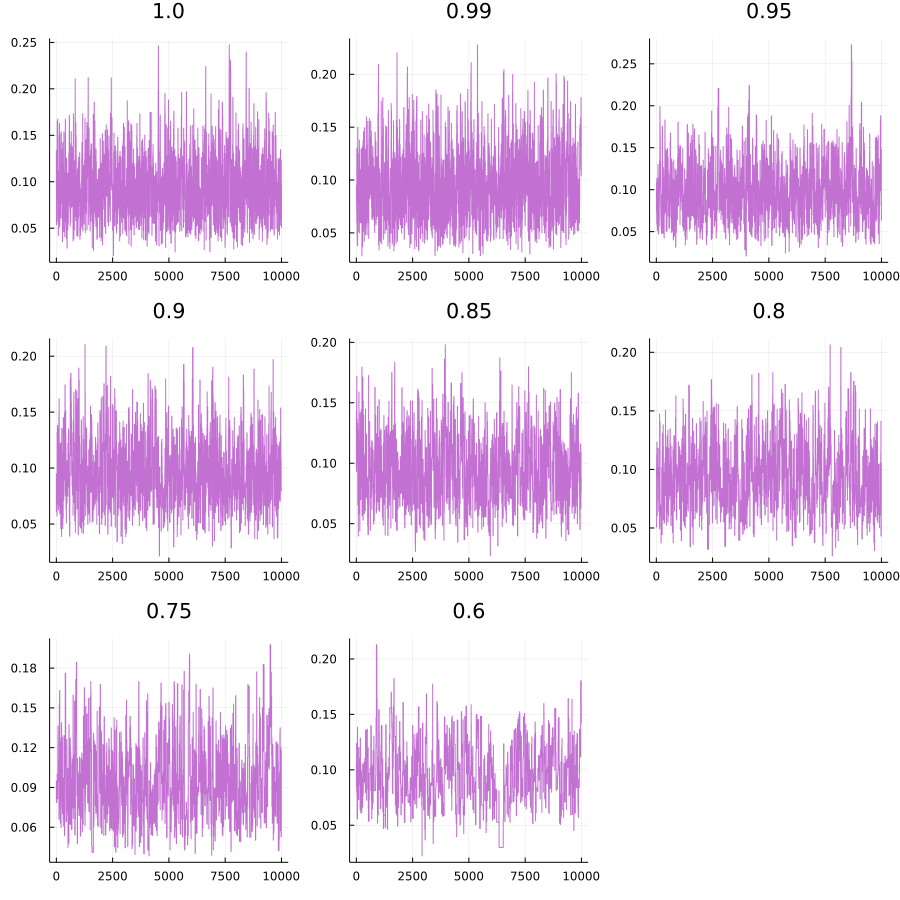

In [13]:
plot(trace_plots...)
plot!(size=(900,900))

In [10]:
Barker(1)

10000×1 Matrix{Float64}:
 0.09513507698668733
 0.09513507698668733
 0.1245318223993064
 0.1245318223993064
 0.1119074176462214
 0.1119074176462214
 0.1119074176462214
 0.1119074176462214
 0.13320033500050965
 0.13320033500050965
 0.13320033500050965
 0.09865298005080936
 0.10124854095212527
 ⋮
 0.06244666343820023
 0.06244666343820023
 0.06244666343820023
 0.06244666343820023
 0.06244666343820023
 0.06244666343820023
 0.053645631160589104
 0.06561251681976357
 0.08522158414139072
 0.08522158414139072
 0.08522158414139072
 0.062193993565589335